In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout 
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTENC

In [2]:
#Read text file into pandas DataFrame by mentioning the symbol for missing values
missing_values = ["?"]
df = pd.read_csv("./processed.cleveland (2).data",header=None,na_values=missing_values)

#Columns headers
df.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]

df



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
#summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [4]:
#Rows and Columns of the data
df.shape

(303, 14)

#initial Data Preprocessing

In [5]:
#Convert [1,2,3] values of the target variable as 1 while keeping 0 as zero to perform binary classification for the 
#presence of heart diesease

new_target = []

for index,row in df.iterrows():
    if row["target"] > 0:
        new_target.append(1)
    else:
        new_target.append(0)

df["ntarget"] = new_target
df["ntarget"] = df["ntarget"].astype("category")
#Remove the target attribute
df.drop("target",axis=1,inplace = True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ntarget
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [6]:
#Convert other categorical variables to numpy categories 
icategoricals = ["sex","cp","fbs","restecg","exang","slope","ca","thal","ntarget"]
categoricals = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

def convert_to_categorical(categoricals,xcolumn):
    for i in categoricals:
        xcolumn[i] = xcolumn[i].astype("category")
    return xcolumn

df = convert_to_categorical(categoricals=icategoricals,xcolumn=df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    category
 12  thal      301 non-null    category
 13  ntarget   303 non-null    category
dtypes: category(9), float64(5)
memory usage: 15.7 KB


In [7]:
#Finding out missing values of the dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
ntarget     0
dtype: int64

<AxesSubplot:>

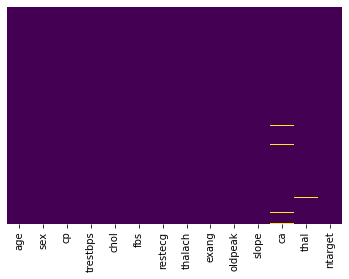

In [8]:
#Heatmap of the missing values of the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#Remove the rows with missing values
df.dropna(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ntarget
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [10]:
#Check if there are any duplicated values
df.duplicated().sum()

0

In [11]:
#Reset Index after the removal
df = df.reset_index(drop=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ntarget
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [12]:
df.shape

(297, 14)

In [13]:
#Statistics of the numerical data attributes
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556
std,9.049736,17.762806,51.997583,22.941562,1.166123
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


#Data Visualization 

In [14]:
#Target Column Distribution
df["ntarget"].value_counts()

0    160
1    137
Name: ntarget, dtype: int64

<AxesSubplot:xlabel='ntarget', ylabel='count'>

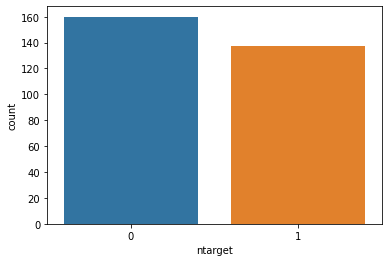

In [15]:
#Count of how many people have heart diesease or not
sns.countplot(x="ntarget",data=df)

In [16]:
#Function to draw histograms of the numerical data attributes
def histogram(ax,column,xlabel,ylabel = "frequency",n_bins=10):
    ax.hist(df[column], n_bins,ec="black")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    title= xlabel+ " Histogram"
    ax.set_title(title)


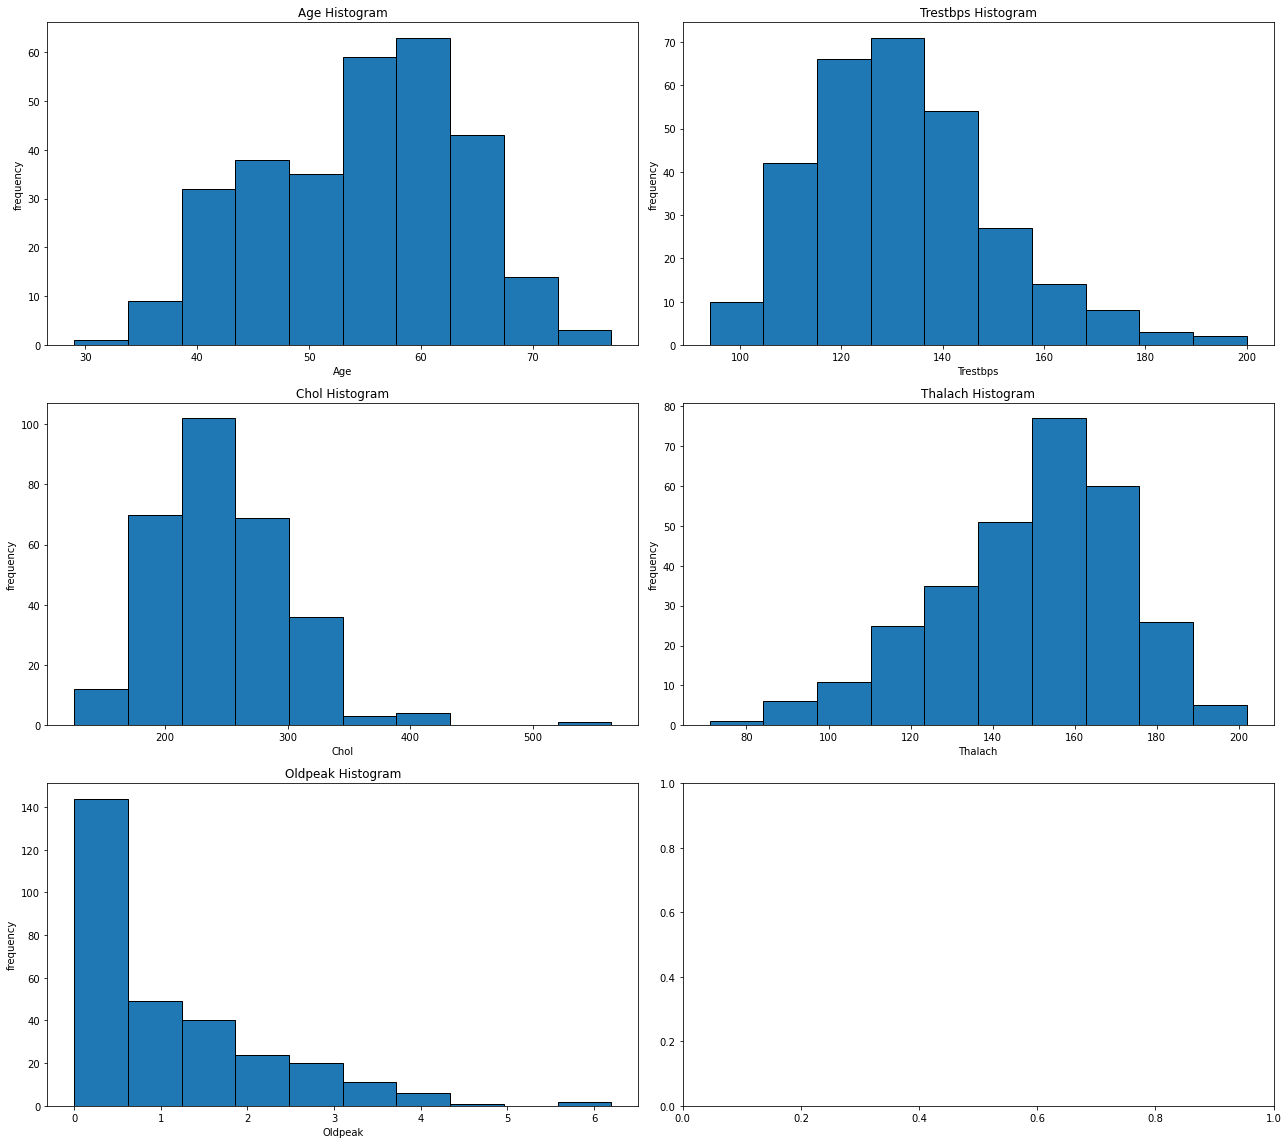

In [17]:
#Histograms of numerical attributes
fig, ((ax0, ax1), (ax2, ax3),(ax4,ax5)) = plt.subplots(nrows=3, ncols=2,figsize=(18,16))

histogram(ax=ax0,column="age",xlabel="Age")
histogram(ax=ax1,column="trestbps",xlabel="Trestbps")
histogram(ax=ax2,column="chol",xlabel="Chol")
histogram(ax=ax3,column="thalach",xlabel="Thalach")
histogram(ax=ax4,column="oldpeak",xlabel="Oldpeak")


plt.tight_layout()

plt.show()


In [18]:
#Function to draw boxplots of the numerical data attributes against the heart diesease detection
def boxplots(ax,column,xlabel):
    sns.boxplot(x=column,data=df,ax=ax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("value")
    title= xlabel+ " Boxplot"
    ax.set_title(title)

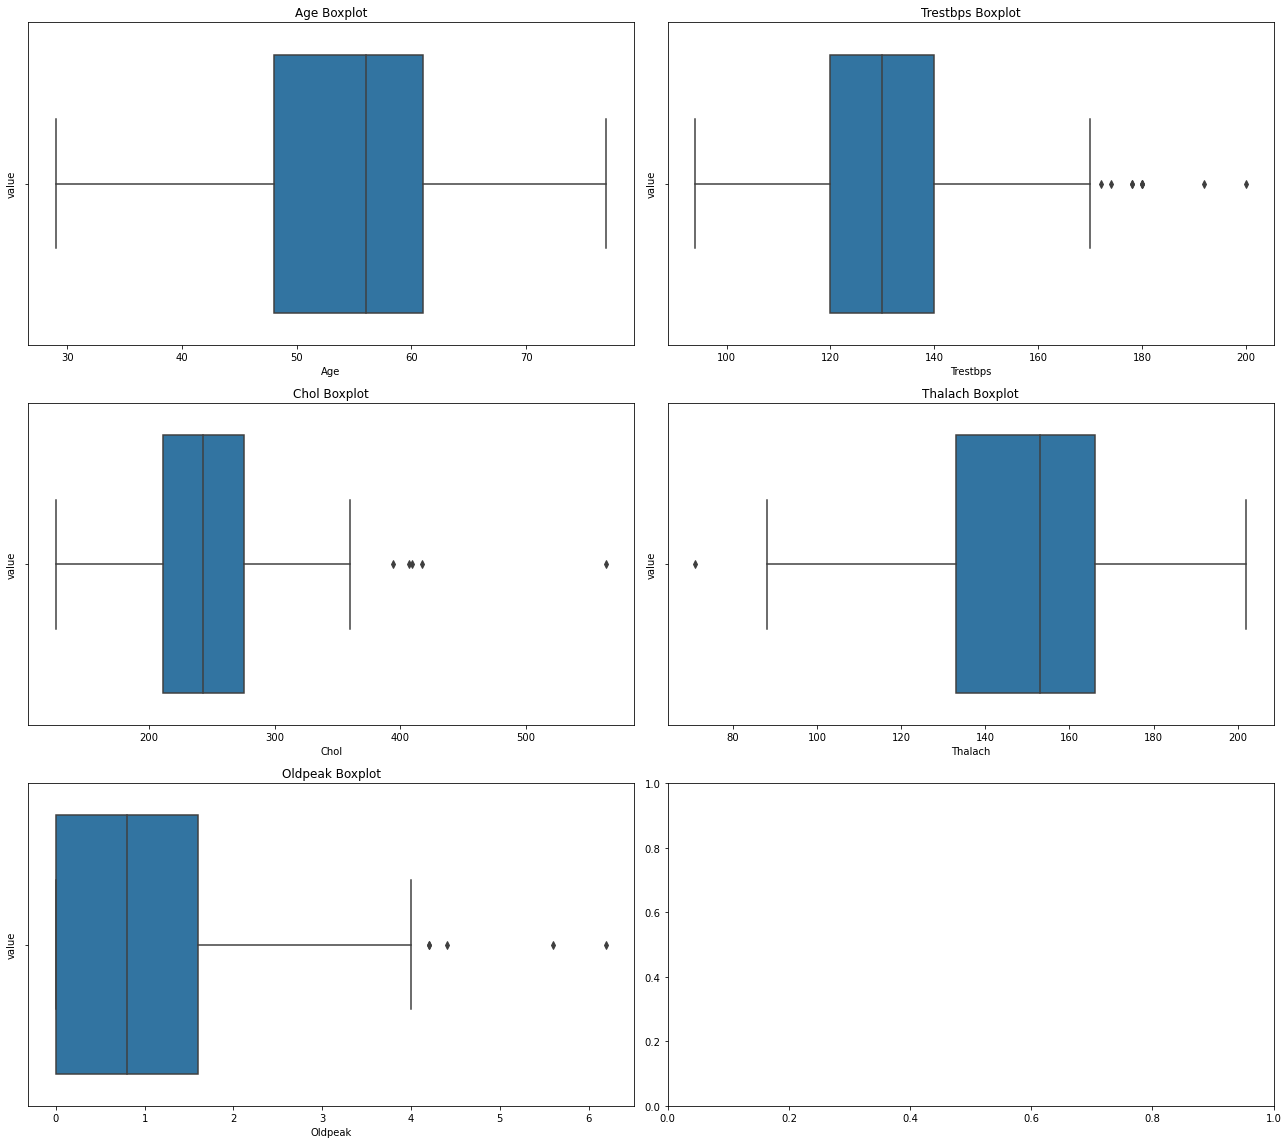

In [19]:
#Boxplots of numerical attributes
fig, ((ax0, ax1), (ax2, ax3),(ax4,ax5)) = plt.subplots(nrows=3, ncols=2,figsize=(18,16))

boxplots(ax=ax0,column="age",xlabel="Age")
boxplots(ax=ax1,column="trestbps",xlabel="Trestbps")
boxplots(ax=ax2,column="chol",xlabel="Chol")
boxplots(ax=ax3,column="thalach",xlabel="Thalach")
boxplots(ax=ax4,column="oldpeak",xlabel="Oldpeak")

plt.tight_layout()

plt.show()

In [20]:
#Numeric attributes 
numeric = ["age","trestbps","chol","thalach","oldpeak"]
dfin = df[numeric]

#Outlier Removal 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
dfin = dfin[~((dfin < (Q1 - 1.5 * IQR)) |(dfin > (Q3 + 1.5 * IQR))).any(axis=1)]

dfs = df.copy()
df = dfs[dfs.index.isin(dfin.index.values)]
df = df.reset_index(drop=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ntarget
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
274,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
275,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
276,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


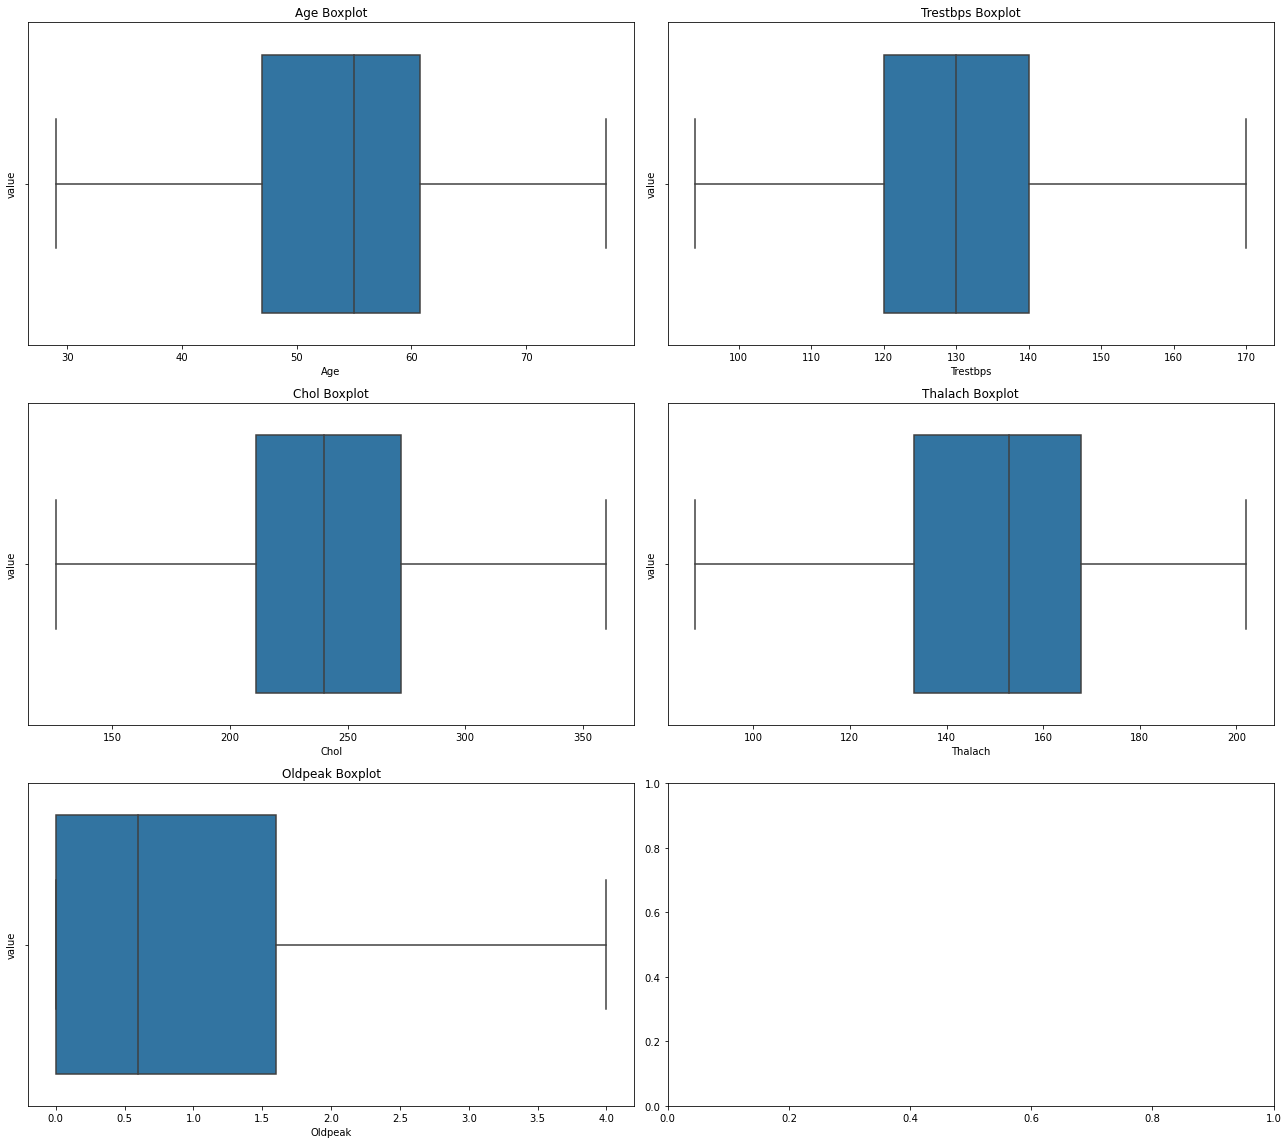

In [21]:
#Boxplot to confirm outliers were removed
fig, ((ax0, ax1), (ax2, ax3),(ax4,ax5)) = plt.subplots(nrows=3, ncols=2,figsize=(18,16))

boxplots(ax=ax0,column="age",xlabel="Age")
boxplots(ax=ax1,column="trestbps",xlabel="Trestbps")
boxplots(ax=ax2,column="chol",xlabel="Chol")
boxplots(ax=ax3,column="thalach",xlabel="Thalach")
boxplots(ax=ax4,column="oldpeak",xlabel="Oldpeak")

plt.tight_layout()

plt.show()

In [22]:
#Function to draw countplots of the categorical data attributes
def countplots(ax,column,xlabel):
    sns.countplot(x=column,data=df,ax=ax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("count")
    title= xlabel+ " Countplot"
    ax.set_title(title)

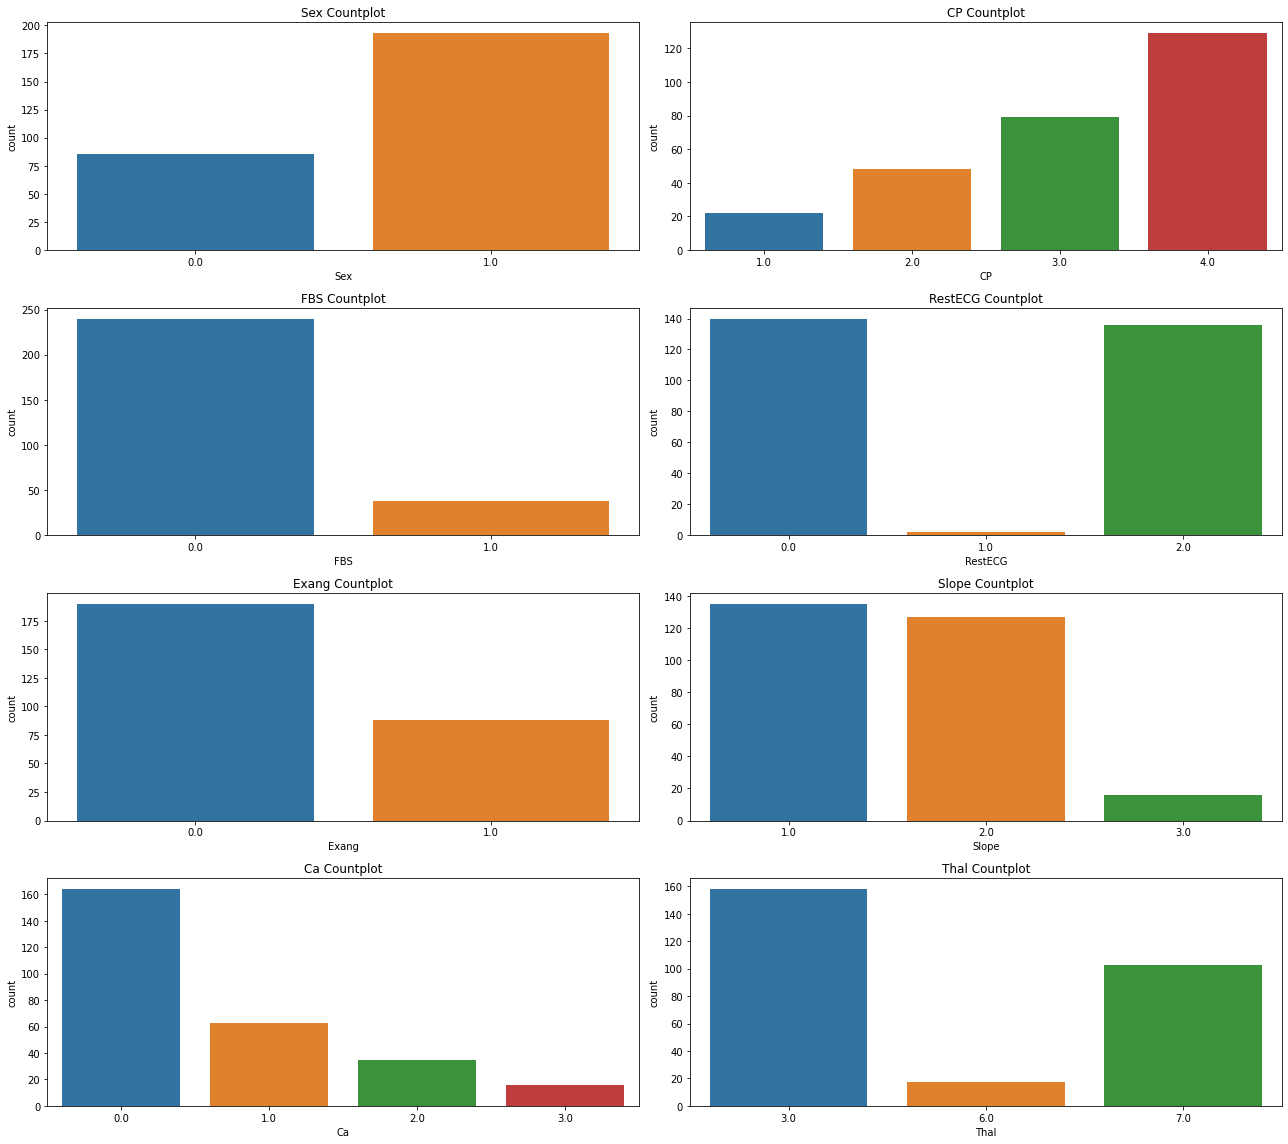

In [23]:
#Countplots of categorical columns
fig, ((ax0, ax1), (ax2, ax3),(ax4, ax5),(ax6, ax7)) = plt.subplots(nrows=4, ncols=2,figsize=(18,16))
    
countplots(ax=ax0,column="sex",xlabel="Sex")
countplots(ax=ax1,column="cp",xlabel="CP")
countplots(ax=ax2,column="fbs",xlabel="FBS")
countplots(ax=ax3,column="restecg",xlabel="RestECG")
countplots(ax=ax4,column="exang",xlabel="Exang")
countplots(ax=ax5,column="slope",xlabel="Slope")
countplots(ax=ax6,column="ca",xlabel="Ca")
countplots(ax=ax7,column="thal",xlabel="Thal")


plt.tight_layout()

plt.show()

In [24]:
#Function to draw countplots of the numerical data attributes against the heart diesease detection
def countplots_with_target(ax,column,xlabel):
    sns.countplot(x=column,data=df,ax=ax,hue="ntarget")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("count")
    title= xlabel+ " Countplot"
    ax.set_title(title)

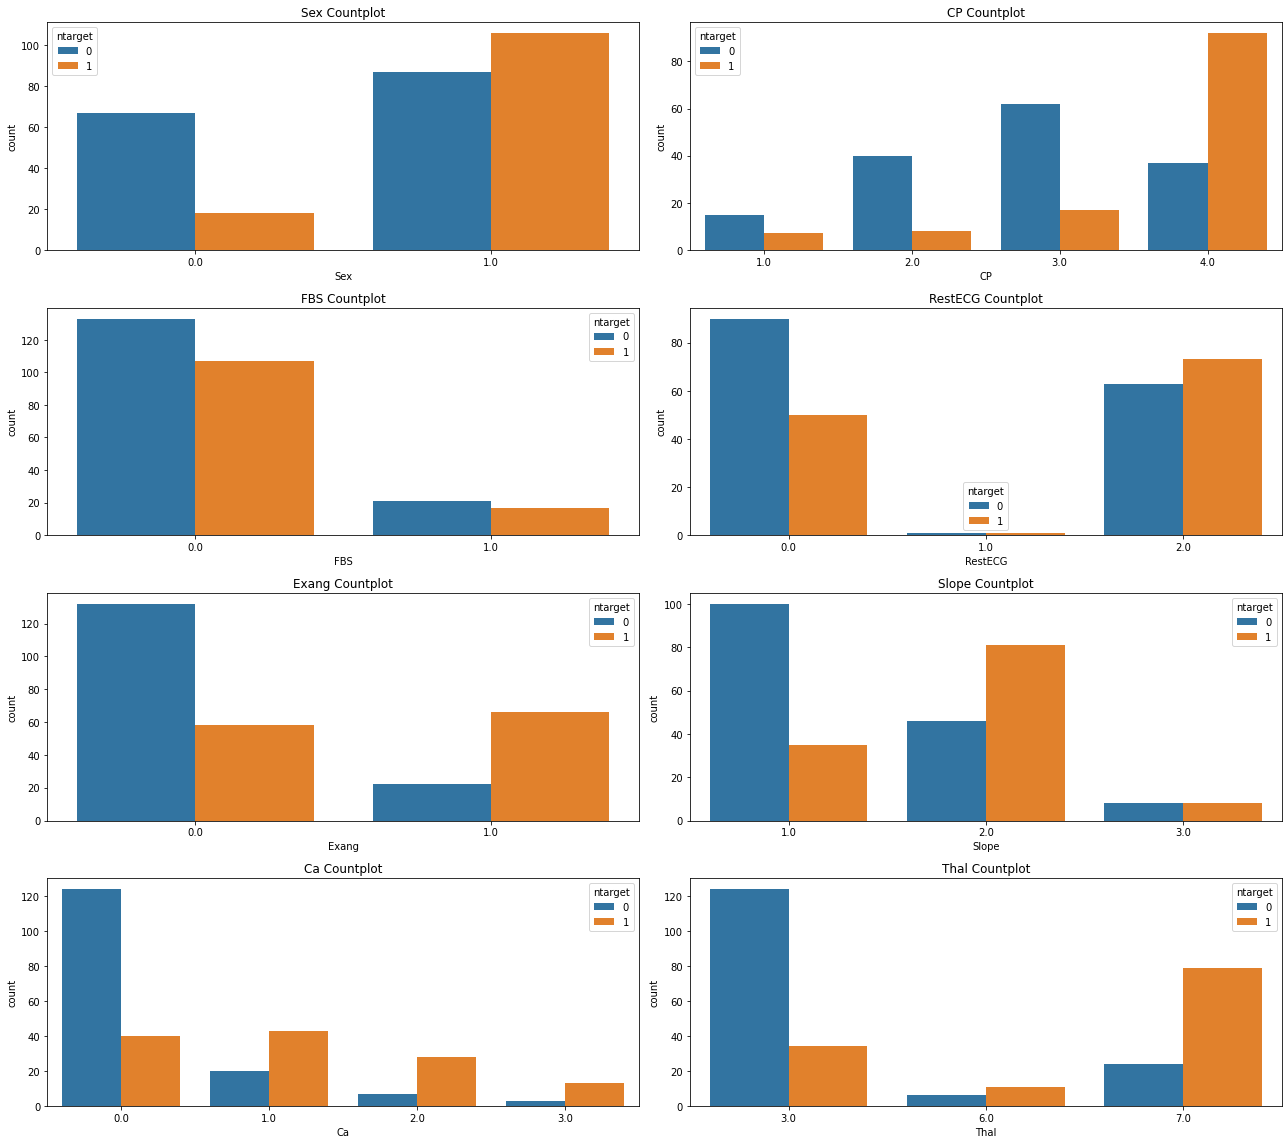

In [25]:
#Countplots of the numerical data attributes against the heart diesease detection
fig, ((ax0, ax1), (ax2, ax3),(ax4, ax5),(ax6, ax7)) = plt.subplots(nrows=4, ncols=2,figsize=(18,16))

countplots_with_target(ax=ax0,column="sex",xlabel="Sex")
countplots_with_target(ax=ax1,column="cp",xlabel="CP")
countplots_with_target(ax=ax2,column="fbs",xlabel="FBS")
countplots_with_target(ax=ax3,column="restecg",xlabel="RestECG")
countplots_with_target(ax=ax4,column="exang",xlabel="Exang")
countplots_with_target(ax=ax5,column="slope",xlabel="Slope")
countplots_with_target(ax=ax6,column="ca",xlabel="Ca")
countplots_with_target(ax=ax7,column="thal",xlabel="Thal")

plt.tight_layout()

plt.show()

In [26]:
#Intial Feature Selection

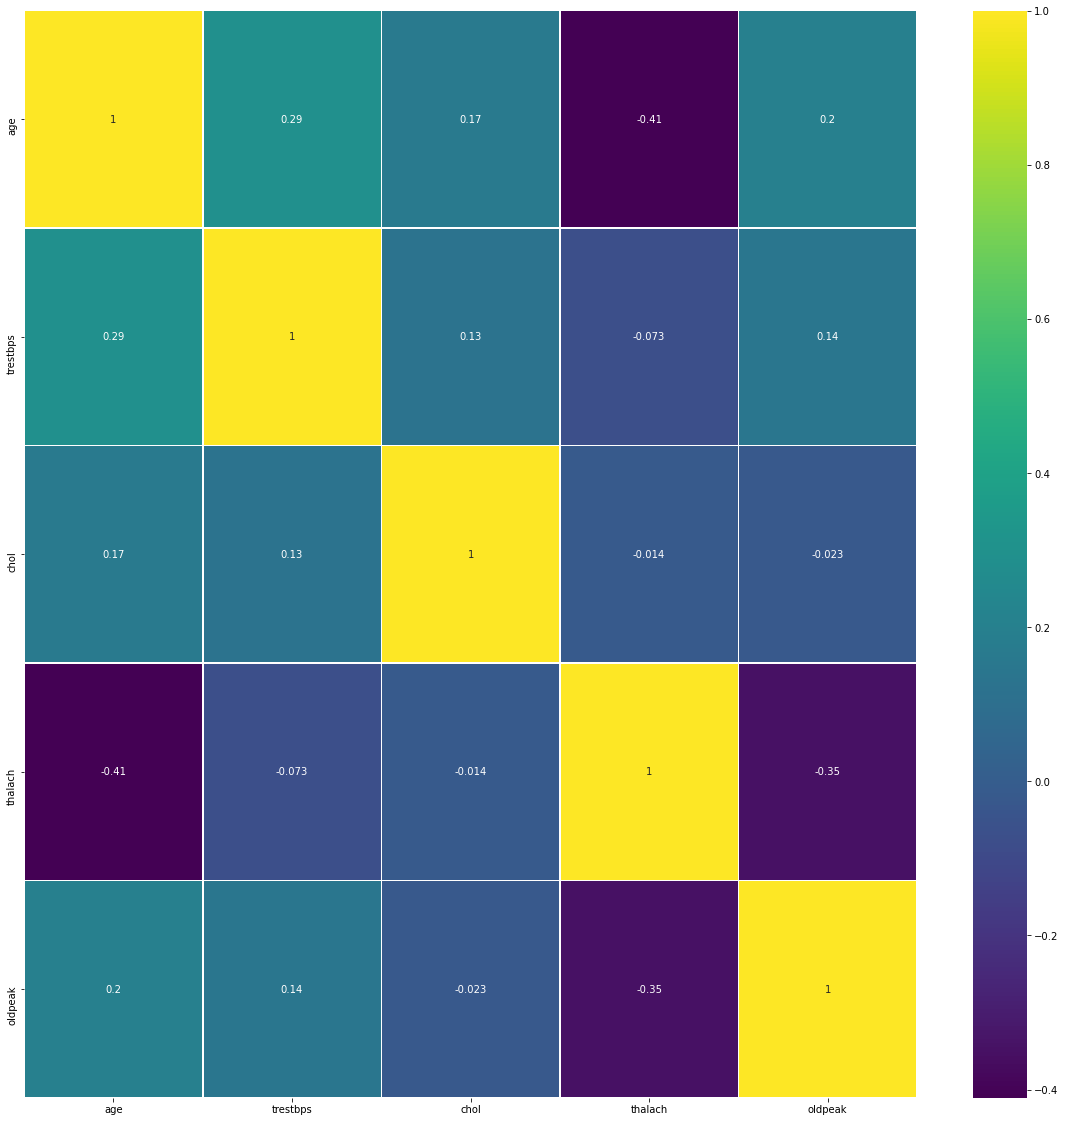

In [27]:
#Correlation matrix
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(correlation_matrix,annot=True,linewidths=0.5,cmap='viridis');

In [28]:
#Function to seperate x and y variables
def seperate_X_and_Y(df):
    xa= df.iloc[:,:-1]
    ya = df["ntarget"]
    return (xa,ya)

In [29]:
x,y = seperate_X_and_Y(df)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
274,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
275,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
276,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       278 non-null    float64 
 1   sex       278 non-null    category
 2   cp        278 non-null    category
 3   trestbps  278 non-null    float64 
 4   chol      278 non-null    float64 
 5   fbs       278 non-null    category
 6   restecg   278 non-null    category
 7   thalach   278 non-null    float64 
 8   exang     278 non-null    category
 9   oldpeak   278 non-null    float64 
 10  slope     278 non-null    category
 11  ca        278 non-null    category
 12  thal      278 non-null    category
dtypes: category(8), float64(5)
memory usage: 14.1 KB


In [31]:
#intial Feature selection using f_class_if
def intial_feature_selection(sf):
    bf = SelectKBest(score_func=sf, k=13)
    fit = bf.fit(x,y)
    df_scores = pd.DataFrame(fit.scores_)
    df_columns = pd.DataFrame(x.columns)
    feat_scores = pd.concat([df_columns, df_scores],axis=1)
    feat_scores.columns = ['Feature_Name','Score']
    print(feat_scores.nlargest(13,'Score'))


intial_feature_selection(f_classif)

   Feature_Name       Score
12         thal  111.078974
11           ca   72.633995
9       oldpeak   62.050135
7       thalach   61.466070
8         exang   57.809430
2            cp   52.648167
10        slope   30.309888
1           sex   29.929150
0           age   15.272371
6       restecg    9.243765
3      trestbps    4.390666
4          chol    3.118899
5           fbs    0.000311


In [32]:
#intial Feature selection using chi score
intial_feature_selection(chi2)

   Feature_Name       Score
7       thalach  173.749418
11           ca   73.327207
12         thal   63.347182
9       oldpeak   56.037775
8         exang   32.904378
4          chol   25.664542
0           age   22.381261
2            cp   13.297751
6       restecg    9.072886
1           sex    8.315578
3      trestbps    8.121221
10        slope    6.298718
5           fbs    0.000270


In [33]:
#SVM

In [34]:
#Function to do label encoding of categorical columns
categoricals = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

def labelencoding(categoricals,xcolumn):
    for i in categoricals:
        xcolumn[i] = xcolumn[i].cat.codes.astype("category")
    return xcolumn

In [35]:
x = labelencoding(categoricals=categoricals,xcolumn=x)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0,1
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3,0
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2,2
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0,0
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,57.0,0,3,140.0,241.0,0,0,123.0,1,0.2,1,0,2
274,45.0,1,0,110.0,264.0,0,0,132.0,0,1.2,1,0,2
275,68.0,1,3,144.0,193.0,1,0,141.0,0,3.4,1,2,2
276,57.0,1,3,130.0,131.0,0,0,115.0,1,1.2,1,1,2


In [36]:
#Scaling the data

sc = StandardScaler()
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
x[cols] = sc.fit_transform(x[cols])
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.967884,1,0,0.966617,-0.226405,1,2,0.000000,0,1.299011,2,0,1
1,1.406469,1,3,1.930000,0.956100,0,2,-1.851258,1,0.521353,1,3,0
2,1.406469,1,3,-0.639021,-0.315650,0,2,-0.925629,1,1.590633,1,2,2
3,-1.882917,1,2,0.003234,0.152889,0,0,1.630871,0,2.465498,2,0,0
4,-1.444332,0,1,0.003234,-0.873435,0,2,0.969707,0,0.424145,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.310007,0,3,0.645490,-0.047913,0,0,-1.190095,1,-0.742342,1,0,2
274,-1.005748,1,0,-1.281276,0.465249,0,0,-0.793396,0,0.229731,1,0,2
275,1.516115,1,3,0.902392,-1.118860,1,0,-0.396698,0,2.368291,1,2,2
276,0.310007,1,3,0.003234,-2.502167,0,0,-1.542715,1,0.229731,1,1,2


In [37]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [38]:
#Initial SVM model


#SVM Classifier
clf = svm.SVC(kernel='linear')

#Train SVM Classifier
clf.fit(X_train, y_train)

#Predict using SVM Classifier
y_pred = clf.predict(X_test)

# Model Accuracy Score 
print(f"Accuracy \n{metrics.accuracy_score(y_test, y_pred)*100} %\n" )

# Model Confusion Matrix
print(f"Confusion Matrix\n{metrics.confusion_matrix(y_test, y_pred)}\n" )

# Model Classification Report
print("classification report\n\n",metrics.classification_report(y_test, y_pred))



Accuracy 
88.09523809523809 %

Confusion Matrix
[[41  5]
 [ 5 33]]

classification report

               precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.87      0.87      0.87        38

    accuracy                           0.88        84
   macro avg       0.88      0.88      0.88        84
weighted avg       0.88      0.88      0.88        84



In [39]:
#Further Feature Selection using l1 penalty
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=1, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)

In [40]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [41]:
x.shape

(278, 13)

In [42]:
#Finding out the selected features
selected_feat = X_train.columns[(model.get_support())]
selected_feat

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [43]:
xnew = x[selected_feat]
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       278 non-null    float64 
 1   sex       278 non-null    category
 2   cp        278 non-null    category
 3   trestbps  278 non-null    float64 
 4   chol      278 non-null    float64 
 5   fbs       278 non-null    category
 6   restecg   278 non-null    category
 7   thalach   278 non-null    float64 
 8   exang     278 non-null    category
 9   oldpeak   278 non-null    float64 
 10  slope     278 non-null    category
 11  ca        278 non-null    category
 12  thal      278 non-null    category
dtypes: category(8), float64(5)
memory usage: 14.1 KB


In [44]:
y.value_counts()

0    154
1    124
Name: ntarget, dtype: int64

In [45]:
#Oversampling 1 values to make the target class distribution equal with SMOTENC
from imblearn.over_sampling import SMOTE
sm = SMOTENC(random_state=42, categorical_features=[1, 2,5,6,8,10,11,12])
xss, yss = sm.fit_resample(x, y)

yss.value_counts()


1    154
0    154
Name: ntarget, dtype: int64

In [46]:
X_sstrain, X_sstest, y_sstrain, y_sstest = train_test_split(xss, yss, test_size=0.3,random_state=109) # 70% training and 30% test

In [47]:
#Traing the model with after eqaulling the class distribution with SMOTENC

clfsm = svm.SVC(kernel='linear') 
clfsm.fit(X_sstrain, y_sstrain)
y_predsm = clf.predict(X_sstest)

# Model Accuracy Score 
print(f"Accuracy \n{metrics.accuracy_score(y_sstest, y_predsm)*100} %\n" )

# Model Confusion Matrix
print(f"Confusion Matrix\n{metrics.confusion_matrix(y_sstest, y_predsm)}\n" )

# Model Classification Report
print("classification report\n\n",metrics.classification_report(y_sstest, y_predsm))

Accuracy 
82.79569892473118 %

Confusion Matrix
[[45  7]
 [ 9 32]]

classification report

               precision    recall  f1-score   support

           0       0.83      0.87      0.85        52
           1       0.82      0.78      0.80        41

    accuracy                           0.83        93
   macro avg       0.83      0.82      0.82        93
weighted avg       0.83      0.83      0.83        93



In [48]:
#Hyperparameter tuning with 10 fold crossvalidation to find the best parameters

svm_clf = svm.SVC(kernel='linear')

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20, 40, 60, 100), 
          "gamma":(0.00001,0.0001,0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=10, verbose=1, scoring="accuracy")
svm_cv.fit(x, y)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")
best_score = svm_cv.best_score_
print(f"Best score: {best_score}")




Fitting 10 folds for each of 270 candidates, totalling 2700 fits
Best params: {'C': 60, 'gamma': 0.0001, 'kernel': 'rbf'}
Best score: 0.8485449735449734


In [49]:
#Traing the model with the best parameters
svm_clf = svm.SVC(C=60,gamma=0.0001,kernel="rbf")
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)


# Model Accuracy Score 
print(f"Accuracy \n{metrics.accuracy_score(y_test, y_pred)*100} %\n" )

# Model Confusion Matrix
print(f"Confusion Matrix\n{metrics.confusion_matrix(y_test, y_pred)}\n" )

# Model Classification Report
print("classification report\n\n",metrics.classification_report(y_test, y_pred))


Accuracy 
90.47619047619048 %

Confusion Matrix
[[44  2]
 [ 6 32]]

classification report

               precision    recall  f1-score   support

           0       0.88      0.96      0.92        46
           1       0.94      0.84      0.89        38

    accuracy                           0.90        84
   macro avg       0.91      0.90      0.90        84
weighted avg       0.91      0.90      0.90        84



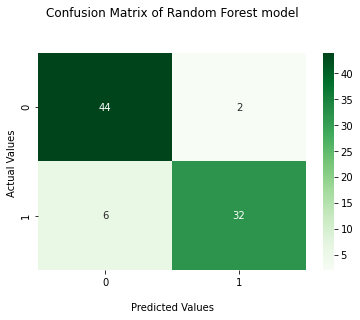

In [50]:
#Plot Confusion Matrix of SVM model
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

ax.set_title('Confusion Matrix of Random Forest model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])


plt.show()

In [51]:
#Random Forest

In [52]:
#Selecting X and Y for the random forest model
xr,yr = seperate_X_and_Y(df)
xr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
274,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
275,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
276,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [53]:
#Label encoding the categorical columns
xr = labelencoding(categoricals=categoricals,xcolumn=xr)
xr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0,1
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3,0
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2,2
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0,0
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,57.0,0,3,140.0,241.0,0,0,123.0,1,0.2,1,0,2
274,45.0,1,0,110.0,264.0,0,0,132.0,0,1.2,1,0,2
275,68.0,1,3,144.0,193.0,1,0,141.0,0,3.4,1,2,2
276,57.0,1,3,130.0,131.0,0,0,115.0,1,1.2,1,1,2


In [54]:
# Split dataset into training set and test set
X_rtrain, X_rtest, y_rtrain, y_rtest = train_test_split(xr, yr, test_size=0.3,random_state=109) # 70% training and 30% test

In [55]:
#Intial Random Forest Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=10)
model.fit(X_rtrain, y_rtrain)
y_rpred = model.predict(X_rtest)

# Model Accuracy Score 
print(f"Accuracy \n{metrics.accuracy_score(y_rtest, y_rpred)*100} %\n" )

# Model Confusion Matrix
print(f"Confusion Matrix\n{metrics.confusion_matrix(y_rtest, y_rpred)}\n" )

# Model Classification Report
print("classification report\n\n",metrics.classification_report(y_rtest, y_rpred))

Accuracy 
88.09523809523809 %

Confusion Matrix
[[42  4]
 [ 6 32]]

classification report

               precision    recall  f1-score   support

           0       0.88      0.91      0.89        46
           1       0.89      0.84      0.86        38

    accuracy                           0.88        84
   macro avg       0.88      0.88      0.88        84
weighted avg       0.88      0.88      0.88        84



In [56]:
#Further Feature Selection using step forward feature selection Wrapper
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

# Build RF classifier to use in feature selection
modeln = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(modeln,
           k_features=13,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=10)

# Perform SFFS
sfs1 = sfs1.fit(xr, yr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   28.8s finished

[2022-03-11 05:25:40] Features: 1/13 -- score: 0.769973544973545[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   26.4s finished

[2022-03-11 05:26:06] Features: 2/13 -- score: 0.7842592592592592[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   24.8s finished

[2022-03-11 05:26:31] Features: 3/13 -- score: 0.8305555555555555[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [57]:
#Selected Features
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [58]:
#Accuracy score using the selected features
print(sfs1.k_score_)

0.8375661375661376


In [59]:
#Selected Feature Names
print(sfs1.k_feature_names_)

('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')


In [60]:
#Oversampling 1 values to make the target class distribution equal with SMOTENC
from imblearn.over_sampling import SMOTE
sm = SMOTENC(random_state=42, categorical_features=[1, 2,5,6,8,10,11,12])
xss, yss = sm.fit_resample(xr, yr)
# summarize the new class distribution
yss.value_counts()

1    154
0    154
Name: ntarget, dtype: int64

In [61]:
X_sstrain, X_sstest, y_sstrain, y_sstest = train_test_split(xss, yss, test_size=0.3,random_state=109) # 70% training and 30% test

In [62]:
#Traing the model with after eqaulling the class distribution with SMOTENC

model = RandomForestClassifier(n_estimators=100,random_state=10) 
model.fit(X_sstrain, y_sstrain)
y_predsm = model.predict(X_sstest)

# Model Accuracy Score 
print(f"Accuracy \n{metrics.accuracy_score(y_sstest, y_predsm)*100} %\n" )

# Model Confusion Matrix
print(f"Confusion Matrix\n{metrics.confusion_matrix(y_sstest, y_predsm)}\n" )

# Model Classification Report
print("classification report\n\n",metrics.classification_report(y_sstest, y_predsm))

Accuracy 
79.56989247311827 %

Confusion Matrix
[[44  8]
 [11 30]]

classification report

               precision    recall  f1-score   support

           0       0.80      0.85      0.82        52
           1       0.79      0.73      0.76        41

    accuracy                           0.80        93
   macro avg       0.79      0.79      0.79        93
weighted avg       0.80      0.80      0.79        93



In [63]:
#Hyper Parameter Tuning of the Random Forest Model with 10 fold crossvalidation

n_estimators = [50,250,500,1000]
max_depth = [2, 3, 5, 10]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(n_estimators=100,random_state=10)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=10, verbose=1, n_jobs=-1)
rf_cv.fit(xr, yr)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")
best_score = rf_cv.best_score_
print(f"Best Score: {best_score}")


Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Best Score: 0.852116402116402


In [64]:
#Final Random Forest Model with the best parameters
rf_clf = RandomForestClassifier(n_estimators=1000,max_depth=5,min_samples_leaf=1,min_samples_split=5,
                                random_state=10)
rf_clf.fit(X_rtrain, y_rtrain)
y_rpred = rf_clf.predict(X_rtest)

# Model Accuracy Score
print(f"Accuracy \n{metrics.accuracy_score(y_rtest, y_rpred)*100} %\n" )

#Model Confusion Matrix
print(f"Confusion Matrix\n{metrics.confusion_matrix(y_rtest, y_rpred)}\n" )

#Model Classification Report 
print("classification report\n\n",metrics.classification_report(y_rtest, y_rpred))

Accuracy 
89.28571428571429 %

Confusion Matrix
[[43  3]
 [ 6 32]]

classification report

               precision    recall  f1-score   support

           0       0.88      0.93      0.91        46
           1       0.91      0.84      0.88        38

    accuracy                           0.89        84
   macro avg       0.90      0.89      0.89        84
weighted avg       0.89      0.89      0.89        84



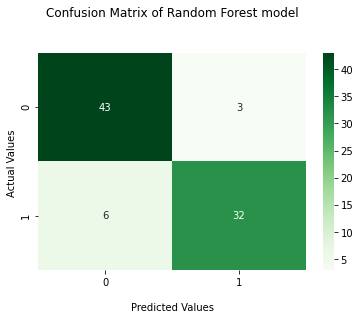

In [65]:
#Plot Confusion Matrix of Random Forest model
cf_matrix = metrics.confusion_matrix(y_rtest, y_rpred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

ax.set_title('Confusion Matrix of Random Forest model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])


plt.show()

In [66]:
#Deep Neural Netweork

In [67]:
#Selecting X and Y for the Deep neural network
xa,ya = seperate_X_and_Y(df)
xa

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
274,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
275,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
276,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [68]:
#Scaling the data

sc = StandardScaler()
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
xa[cols] = sc.fit_transform(xa[cols])
xa

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.967884,1.0,1.0,0.966617,-0.226405,1.0,2.0,0.000000,0.0,1.299011,3.0,0.0,6.0
1,1.406469,1.0,4.0,1.930000,0.956100,0.0,2.0,-1.851258,1.0,0.521353,2.0,3.0,3.0
2,1.406469,1.0,4.0,-0.639021,-0.315650,0.0,2.0,-0.925629,1.0,1.590633,2.0,2.0,7.0
3,-1.882917,1.0,3.0,0.003234,0.152889,0.0,0.0,1.630871,0.0,2.465498,3.0,0.0,3.0
4,-1.444332,0.0,2.0,0.003234,-0.873435,0.0,2.0,0.969707,0.0,0.424145,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.310007,0.0,4.0,0.645490,-0.047913,0.0,0.0,-1.190095,1.0,-0.742342,2.0,0.0,7.0
274,-1.005748,1.0,1.0,-1.281276,0.465249,0.0,0.0,-0.793396,0.0,0.229731,2.0,0.0,7.0
275,1.516115,1.0,4.0,0.902392,-1.118860,1.0,0.0,-0.396698,0.0,2.368291,2.0,2.0,7.0
276,0.310007,1.0,4.0,0.003234,-2.502167,0.0,0.0,-1.542715,1.0,0.229731,2.0,1.0,7.0


In [69]:
#Label encoding the data
xa = labelencoding(categoricals=categoricals,xcolumn=xa)
xa

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.967884,1,0,0.966617,-0.226405,1,2,0.000000,0,1.299011,2,0,1
1,1.406469,1,3,1.930000,0.956100,0,2,-1.851258,1,0.521353,1,3,0
2,1.406469,1,3,-0.639021,-0.315650,0,2,-0.925629,1,1.590633,1,2,2
3,-1.882917,1,2,0.003234,0.152889,0,0,1.630871,0,2.465498,2,0,0
4,-1.444332,0,1,0.003234,-0.873435,0,2,0.969707,0,0.424145,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.310007,0,3,0.645490,-0.047913,0,0,-1.190095,1,-0.742342,1,0,2
274,-1.005748,1,0,-1.281276,0.465249,0,0,-0.793396,0,0.229731,1,0,2
275,1.516115,1,3,0.902392,-1.118860,1,0,-0.396698,0,2.368291,1,2,2
276,0.310007,1,3,0.003234,-2.502167,0,0,-1.542715,1,0.229731,1,1,2


In [70]:
# Split dataset into training set and test set
X_atrain, X_atest, y_atrain, y_atest = train_test_split(xa, ya, test_size=0.3,random_state=109) # 70% training and 30% test

In [71]:
#Initial Deep Neural Network 

model = Sequential()
model.add(Dense(16, input_dim=13,kernel_initializer="normal", activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu',kernel_initializer="normal"))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu',kernel_initializer="normal"))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.fit(X_atrain, y_atrain, epochs=200, batch_size=10, verbose = 1,validation_split=0.2)

Epoch 1/200
16/16 [==============================] - 2s 30ms/step - loss: 0.6929 - accuracy: 0.5548 - val_loss: 0.6931 - val_accuracy: 0.4872
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5871 - val_loss: 0.6929 - val_accuracy: 0.4872
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.6065 - val_loss: 0.6923 - val_accuracy: 0.4872
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.6258 - val_loss: 0.6914 - val_accuracy: 0.4872
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6882 - accuracy: 0.6516 - val_loss: 0.6883 - val_accuracy: 0.7949
Epoch 6/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6851 - accuracy: 0.7161 - val_loss: 0.6837 - val_accuracy: 0.8205
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6763 - accuracy: 0.7290 - val_loss: 0.6731 - val_accuracy: 0.7436
Epoch 8/200


Epoch 59/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4624 - accuracy: 0.8323 - val_loss: 0.5243 - val_accuracy: 0.6923
Epoch 60/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4631 - accuracy: 0.8258 - val_loss: 0.5139 - val_accuracy: 0.7179
Epoch 61/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4439 - accuracy: 0.8516 - val_loss: 0.5185 - val_accuracy: 0.6923
Epoch 62/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4382 - accuracy: 0.8645 - val_loss: 0.5258 - val_accuracy: 0.6923
Epoch 63/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4321 - accuracy: 0.8645 - val_loss: 0.5239 - val_accuracy: 0.6923
Epoch 64/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4614 - accuracy: 0.8581 - val_loss: 0.5165 - val_accuracy: 0.7179
Epoch 65/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4407 - accuracy: 0.8516 - val_loss: 0.5218 - val_accuracy: 0.7179
Epoch 

16/16 [==============================] - 0s 5ms/step - loss: 0.3925 - accuracy: 0.8645 - val_loss: 0.5782 - val_accuracy: 0.6923
Epoch 117/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3480 - accuracy: 0.8903 - val_loss: 0.5687 - val_accuracy: 0.6923
Epoch 118/200
16/16 [==============================] - 0s 6ms/step - loss: 0.3340 - accuracy: 0.9032 - val_loss: 0.5825 - val_accuracy: 0.6923
Epoch 119/200
16/16 [==============================] - 0s 7ms/step - loss: 0.3874 - accuracy: 0.8581 - val_loss: 0.5505 - val_accuracy: 0.6923
Epoch 120/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4045 - accuracy: 0.8516 - val_loss: 0.5060 - val_accuracy: 0.7436
Epoch 121/200
16/16 [==============================] - 0s 6ms/step - loss: 0.3348 - accuracy: 0.9032 - val_loss: 0.5256 - val_accuracy: 0.7436
Epoch 122/200
16/16 [==============================] - 0s 6ms/step - loss: 0.3766 - accuracy: 0.8839 - val_loss: 0.5547 - val_accuracy: 0.7179
Epoch 123/200

16/16 [==============================] - 0s 5ms/step - loss: 0.3090 - accuracy: 0.8903 - val_loss: 0.6545 - val_accuracy: 0.7179
Epoch 174/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3124 - accuracy: 0.9097 - val_loss: 0.6291 - val_accuracy: 0.7179
Epoch 175/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3077 - accuracy: 0.8968 - val_loss: 0.5864 - val_accuracy: 0.7436
Epoch 176/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3154 - accuracy: 0.9097 - val_loss: 0.5846 - val_accuracy: 0.7436
Epoch 177/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3032 - accuracy: 0.9097 - val_loss: 0.5894 - val_accuracy: 0.7436
Epoch 178/200
16/16 [==============================] - 0s 6ms/step - loss: 0.3520 - accuracy: 0.8968 - val_loss: 0.5808 - val_accuracy: 0.7436
Epoch 179/200
16/16 [==============================] - 0s 6ms/step - loss: 0.3389 - accuracy: 0.8774 - val_loss: 0.6215 - val_accuracy: 0.7179
Epoch 180/200

In [72]:
pred = model.predict(X_atest)

y_apred = np.where(pred > 0.5, 1,0)

# Model Accuracy Score
print(f"Accuracy \n{metrics.accuracy_score(y_atest, y_apred)*100} %\n" )

# Model Confusion Matrix
print(f"Confusion Matrix\n{metrics.confusion_matrix(y_atest, y_apred)}\n" )

# Model Classification Report
print("classification report\n\n",metrics.classification_report(y_atest, y_apred))

Accuracy 
83.33333333333334 %

Confusion Matrix
[[40  6]
 [ 8 30]]

classification report

               precision    recall  f1-score   support

           0       0.83      0.87      0.85        46
           1       0.83      0.79      0.81        38

    accuracy                           0.83        84
   macro avg       0.83      0.83      0.83        84
weighted avg       0.83      0.83      0.83        84



In [73]:
#Oversampling 1 values to make the target class distribution equal with SMOTENC
from imblearn.over_sampling import SMOTE
sm = SMOTENC(random_state=42, categorical_features=[1, 2,5,6,8,10,11,12])
xss, yss = sm.fit_resample(xa, ya)

X_sstrain, X_sstest, y_sstrain, y_sstest = train_test_split(xss, yss, test_size=0.3,random_state=109) 

#Traing the model with after eqaulling the class distribution with SMOTENC

model.fit(X_sstrain, y_sstrain, epochs=200, batch_size=10, verbose = 1,validation_split=0.2)


Epoch 1/200
18/18 [==============================] - 0s 7ms/step - loss: 0.3782 - accuracy: 0.8895 - val_loss: 0.6250 - val_accuracy: 0.7209
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3113 - accuracy: 0.8837 - val_loss: 0.6340 - val_accuracy: 0.6977
Epoch 3/200
18/18 [==============================] - 0s 7ms/step - loss: 0.2970 - accuracy: 0.8895 - val_loss: 0.5853 - val_accuracy: 0.7442
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2827 - accuracy: 0.9128 - val_loss: 0.6103 - val_accuracy: 0.7209
Epoch 5/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2567 - accuracy: 0.9128 - val_loss: 0.6317 - val_accuracy: 0.7209
Epoch 6/200
18/18 [==============================] - 0s 6ms/step - loss: 0.3097 - accuracy: 0.9128 - val_loss: 0.6056 - val_accuracy: 0.7442
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3051 - accuracy: 0.8895 - val_loss: 0.5904 - val_accuracy: 0.7442
Epoch 8/200
1

Epoch 59/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2388 - accuracy: 0.9244 - val_loss: 0.6496 - val_accuracy: 0.7674
Epoch 60/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2306 - accuracy: 0.9360 - val_loss: 0.6650 - val_accuracy: 0.7674
Epoch 61/200
18/18 [==============================] - 0s 7ms/step - loss: 0.2484 - accuracy: 0.9070 - val_loss: 0.6742 - val_accuracy: 0.7907
Epoch 62/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2608 - accuracy: 0.9128 - val_loss: 0.6666 - val_accuracy: 0.7674
Epoch 63/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2471 - accuracy: 0.9128 - val_loss: 0.6723 - val_accuracy: 0.7674
Epoch 64/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2425 - accuracy: 0.9070 - val_loss: 0.6747 - val_accuracy: 0.7907
Epoch 65/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2170 - accuracy: 0.9302 - val_loss: 0.6715 - val_accuracy: 0.7907
Epoch 

18/18 [==============================] - 0s 6ms/step - loss: 0.2205 - accuracy: 0.9302 - val_loss: 0.7291 - val_accuracy: 0.7674
Epoch 117/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2048 - accuracy: 0.9360 - val_loss: 0.7384 - val_accuracy: 0.7674
Epoch 118/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2001 - accuracy: 0.9244 - val_loss: 0.7425 - val_accuracy: 0.7674
Epoch 119/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2068 - accuracy: 0.9302 - val_loss: 0.7508 - val_accuracy: 0.7674
Epoch 120/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2248 - accuracy: 0.9186 - val_loss: 0.7755 - val_accuracy: 0.7674
Epoch 121/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2314 - accuracy: 0.9302 - val_loss: 0.7646 - val_accuracy: 0.7674
Epoch 122/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2038 - accuracy: 0.9419 - val_loss: 0.7760 - val_accuracy: 0.7674
Epoch 123/200

18/18 [==============================] - 0s 6ms/step - loss: 0.2177 - accuracy: 0.9244 - val_loss: 0.8028 - val_accuracy: 0.7674
Epoch 174/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2004 - accuracy: 0.9302 - val_loss: 0.8139 - val_accuracy: 0.7907
Epoch 175/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2089 - accuracy: 0.9244 - val_loss: 0.8098 - val_accuracy: 0.7674
Epoch 176/200
18/18 [==============================] - 0s 7ms/step - loss: 0.1968 - accuracy: 0.9360 - val_loss: 0.8251 - val_accuracy: 0.7674
Epoch 177/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2054 - accuracy: 0.9360 - val_loss: 0.8389 - val_accuracy: 0.7674
Epoch 178/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2034 - accuracy: 0.9360 - val_loss: 0.8552 - val_accuracy: 0.7674
Epoch 179/200
18/18 [==============================] - 0s 7ms/step - loss: 0.2126 - accuracy: 0.9302 - val_loss: 0.8525 - val_accuracy: 0.7674
Epoch 180/200

In [74]:

predss = model.predict(X_sstest)

y_apredss = np.where(predss > 0.5, 1,0)

# Model Accuracy Score
print(f"Accuracy \n{metrics.accuracy_score(y_sstest, y_apredss)*100} %\n" )

# Model Confusion Matrix
print(f"Confusion Matrix\n{metrics.confusion_matrix(y_sstest, y_apredss)}\n" )

# Model Classification Report
print("classification report\n\n",metrics.classification_report(y_sstest, y_apredss))

Accuracy 
82.79569892473118 %

Confusion Matrix
[[48  4]
 [12 29]]

classification report

               precision    recall  f1-score   support

           0       0.80      0.92      0.86        52
           1       0.88      0.71      0.78        41

    accuracy                           0.83        93
   macro avg       0.84      0.82      0.82        93
weighted avg       0.83      0.83      0.82        93



In [75]:
#Function for hyperparameter tuning of the neural network
def model_builder(hp):
    hp_units1 = hp.Int('units1', min_value=0, max_value=50, step=1)
    hp_units2 = hp.Int('units2', min_value=0, max_value=30, step=1)
    hp_units3 = hp.Int('units3', min_value=0, max_value=15, step=1)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model = Sequential()
    model.add(Dense(units= hp_units1, input_dim=13, activation='relu',kernel_initializer="normal"))
    model.add(Dropout(0.25))
    model.add(Dense(units= hp_units2, activation='relu',kernel_initializer="normal"))
    model.add(Dropout(0.25))
    model.add(Dense(units= hp_units3, activation='relu',kernel_initializer="normal"))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])
  
    return model

In [76]:
#Create the tuner 
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kts11')

INFO:tensorflow:Reloading Oracle from existing project my_dir\intro_to_kts11\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir\intro_to_kts11\tuner0.json


In [77]:
#Early Stopping function
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [78]:
tuner.search(xa, ya, epochs=20, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. 
The optimal number of units in the first densely-connected layer is {best_hps.get('units1')}
second densely-connected layer is {best_hps.get('units2')}
third densely-connected layer is {best_hps.get('units3')} 
and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. 
The optimal number of units in the first densely-connected layer is 11
second densely-connected layer is 20
third densely-connected layer is 13 
and the optimal learning rate for the optimizer
is 0.01.



In [79]:
#Final Deep Neural Network 
model = Sequential()
model.add(Dense(11, input_dim=13, activation='relu',kernel_initializer="normal"))
model.add(Dropout(0.25))
model.add(Dense(20, activation='relu',kernel_initializer="normal"))
model.add(Dropout(0.25))
model.add(Dense(13, activation='relu',kernel_initializer="normal"))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

model.fit(X_atrain, y_atrain, epochs=200, batch_size=10, verbose = 1,validation_split=0.2)

Epoch 1/200
16/16 [==============================] - 2s 26ms/step - loss: 0.6860 - accuracy: 0.6065 - val_loss: 0.6617 - val_accuracy: 0.8205
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6140 - accuracy: 0.7613 - val_loss: 0.5317 - val_accuracy: 0.7692
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5359 - accuracy: 0.7484 - val_loss: 0.4694 - val_accuracy: 0.7949
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5232 - accuracy: 0.7677 - val_loss: 0.4674 - val_accuracy: 0.7949
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 0.4726 - accuracy: 0.7806 - val_loss: 0.4903 - val_accuracy: 0.7692
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 0.4235 - accuracy: 0.8387 - val_loss: 0.4742 - val_accuracy: 0.8205
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4227 - accuracy: 0.8581 - val_loss: 0.5423 - val_accuracy: 0.7692
Epoch 8/200


Epoch 59/200
16/16 [==============================] - 0s 6ms/step - loss: 0.2587 - accuracy: 0.8903 - val_loss: 0.7437 - val_accuracy: 0.8205
Epoch 60/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2874 - accuracy: 0.8774 - val_loss: 0.8227 - val_accuracy: 0.7692
Epoch 61/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2360 - accuracy: 0.8903 - val_loss: 0.9387 - val_accuracy: 0.7692
Epoch 62/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2125 - accuracy: 0.9161 - val_loss: 1.0774 - val_accuracy: 0.7949
Epoch 63/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2138 - accuracy: 0.9161 - val_loss: 1.0950 - val_accuracy: 0.7436
Epoch 64/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2818 - accuracy: 0.8645 - val_loss: 0.9959 - val_accuracy: 0.7436
Epoch 65/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1870 - accuracy: 0.9355 - val_loss: 0.9412 - val_accuracy: 0.7436
Epoch 

16/16 [==============================] - 0s 4ms/step - loss: 0.2351 - accuracy: 0.9355 - val_loss: 1.0941 - val_accuracy: 0.8205
Epoch 117/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2071 - accuracy: 0.9226 - val_loss: 1.2654 - val_accuracy: 0.7436
Epoch 118/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1916 - accuracy: 0.9419 - val_loss: 1.3712 - val_accuracy: 0.7692
Epoch 119/200
16/16 [==============================] - 0s 3ms/step - loss: 0.1832 - accuracy: 0.9419 - val_loss: 1.3719 - val_accuracy: 0.7692
Epoch 120/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2319 - accuracy: 0.9097 - val_loss: 1.0588 - val_accuracy: 0.7692
Epoch 121/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1870 - accuracy: 0.9355 - val_loss: 1.1208 - val_accuracy: 0.7692
Epoch 122/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2196 - accuracy: 0.9419 - val_loss: 1.1371 - val_accuracy: 0.7692
Epoch 123/200

16/16 [==============================] - 0s 5ms/step - loss: 0.2059 - accuracy: 0.9161 - val_loss: 1.2335 - val_accuracy: 0.7179
Epoch 174/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1902 - accuracy: 0.9290 - val_loss: 1.2920 - val_accuracy: 0.6923
Epoch 175/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1694 - accuracy: 0.9290 - val_loss: 1.4121 - val_accuracy: 0.6923
Epoch 176/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1422 - accuracy: 0.9548 - val_loss: 1.4403 - val_accuracy: 0.7436
Epoch 177/200
16/16 [==============================] - 0s 7ms/step - loss: 0.1515 - accuracy: 0.9419 - val_loss: 1.4644 - val_accuracy: 0.7692
Epoch 178/200
16/16 [==============================] - 0s 7ms/step - loss: 0.1792 - accuracy: 0.9355 - val_loss: 1.5758 - val_accuracy: 0.7436
Epoch 179/200
16/16 [==============================] - 0s 8ms/step - loss: 0.1302 - accuracy: 0.9548 - val_loss: 1.4959 - val_accuracy: 0.7436
Epoch 180/200

In [80]:
pred = model.predict(X_atest)

y_apred = np.where(pred > 0.5, 1,0)

# Model Accuracy Score  
print(f"Accuracy \n{metrics.accuracy_score(y_atest, y_apred)*100} %\n" )

# Model Confusion Matrix
print(f"Confusion Matrix\n{metrics.confusion_matrix(y_atest, y_apred)}\n" )

# Model Classification Report
print("classification report\n\n",metrics.classification_report(y_atest, y_apred))

Accuracy 
86.90476190476191 %

Confusion Matrix
[[41  5]
 [ 6 32]]

classification report

               precision    recall  f1-score   support

           0       0.87      0.89      0.88        46
           1       0.86      0.84      0.85        38

    accuracy                           0.87        84
   macro avg       0.87      0.87      0.87        84
weighted avg       0.87      0.87      0.87        84



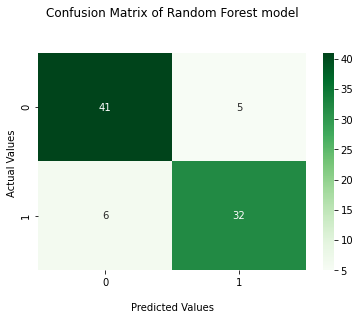

In [81]:
#Plot Confusion Matrix of Deep Neural Network model
cf_matrix = metrics.confusion_matrix(y_atest, y_apred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

ax.set_title('Confusion Matrix of Random Forest model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])


plt.show()

In [82]:
#Final Deep Neural Network Architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                154       
                                                                 
 dropout_6 (Dropout)         (None, 11)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                240       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 13)                273       
                                                                 
 dropout_8 (Dropout)         (None, 13)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [83]:
#Model Comparison

In [84]:
#Create table to comapre models
data = {'Model': ["SVM", "RF", "DNN"],
        'Accuracy': [90.4,89.2,89.2],
        'Precision': [91,89,89], 
        'Recall': [90,89,89], 
        'F1 Score': [90,89,89]}

modeldf = pd.DataFrame.from_dict(data)
modeldf

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,90.4,91,90,90
1,RF,89.2,89,89,89
2,DNN,89.2,89,89,89


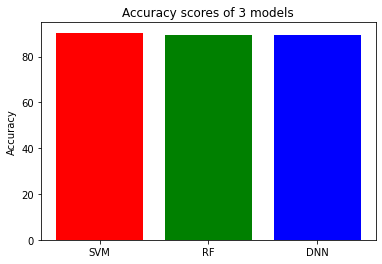

<Figure size 720000x72000 with 0 Axes>

In [85]:
y_pos = np.arange(len(modeldf["Model"]))

# Create barplot for the accuracies of the 3 models 
plt.bar(y_pos,modeldf["Accuracy"],color=['red', 'green', 'blue'] )

plt.xticks(y_pos, modeldf["Model"])
plt.ylabel("Accuracy")
plt.title("Accuracy scores of 3 models")
plt.figure(figsize=(10000,1000))

plt.show()